In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint
import csv

# preperation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 


# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#For Paired T-Test
from mlxtend.evaluate import paired_ttest_kfold_cv 



In [2]:
#2. Reading data from a file path

path = 'D:/study/uottawa/winter 2019/Machine Learning/project/train_data.csv'
data_df = pd.read_csv(path)

data_df.shape
    
data_df.describe()
    
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
number_of_elements                 21263 non-null int64
mean_atomic_mass                   21263 non-null float64
wtd_mean_atomic_mass               21263 non-null float64
gmean_atomic_mass                  21263 non-null float64
wtd_gmean_atomic_mass              21263 non-null float64
entropy_atomic_mass                21263 non-null float64
wtd_entropy_atomic_mass            21263 non-null float64
range_atomic_mass                  21263 non-null float64
wtd_range_atomic_mass              21263 non-null float64
std_atomic_mass                    21263 non-null float64
wtd_std_atomic_mass                21263 non-null float64
mean_fie                           21263 non-null float64
wtd_mean_fie                       21263 non-null float64
gmean_fie                          21263 non-null float64
wtd_gmean_fie                      21263 non-null float64
entropy_fie            

In [3]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['number_of_elements' , 'range_atomic_radius' ,'range_Valence']

floatFeatures = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
        'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
       'critical_temp']




stringFeatures = []

# Clean the NaN's
for feature in data_df:
    if feature in intFeatures:
        data_df[feature] = data_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data_df[feature] = data_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data_df[feature] = data_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
        
data_df[data_df==np.inf]=0.0
data_df.fillna(data_df.mean(), inplace=True)
data_df.head(20)   



,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [4]:
#categorization of data

data_df['critical_temp_class'] = 'default value'

data_df['critical_temp_class'] = np.where(data_df['critical_temp'] <= 20, 'low', 'high')

#print(data_df.head(20))

# Dropping the critical temp column

data_df = data_df.drop(['critical_temp'], axis= 1)

data_df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp_class
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.906070,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,high
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.906070,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,high
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.906070,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,low
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.906070,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,high
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.906070,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,high
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.906070,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,high
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.906070,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,low
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.906070,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,high
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.906070,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,high
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.906070,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,high


In [5]:
# 5.Checking for missing data

total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data


,Total,Percent
critical_temp_class,0,0.0
wtd_std_fie,0,0.0
wtd_mean_atomic_radius,0,0.0
gmean_atomic_radius,0,0.0
wtd_gmean_atomic_radius,0,0.0
entropy_atomic_radius,0,0.0
wtd_entropy_atomic_radius,0,0.0
range_atomic_radius,0,0.0
wtd_range_atomic_radius,0,0.0
std_atomic_radius,0,0.0


In [6]:
#Normalization of data

labelDict = {}
le = preprocessing.LabelEncoder()
le.fit(data_df['critical_temp_class'])   
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))    
data_df['critical_temp_class'] = le.transform(data_df['critical_temp_class'])  
# Get labels

labelKey = 'label_' + feature   
labelValue = [*le_name_mapping]   
labelDict[labelKey] =labelValue    

for key, value in labelDict.items():     
    print(key, value)
    
    
data_df.head(20)    

label_critical_temp ['high', 'low']


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp_class
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,1
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,1
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0


In [7]:
#Min max scaler 

X = data_df.drop(['critical_temp_class'], axis= 1)

scaler = MinMaxScaler(feature_range=(0.1, 1), copy=False)
scaled_data=scaler.fit(X)
print(scaled_data)
transformed_data=scaler.transform(X)
print(transformed_data)

y = data_df.loc[:,['critical_temp_class']].values

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.20, random_state=42)

MinMaxScaler(copy=False, feature_range=(0.1, 1))
[[0.4375     0.46529073 0.32855457 ... 0.23974756 0.22990381 0.23111764]
 [0.55       0.48215018 0.33146808 ... 0.24526391 0.28973666 0.24058188]
 [0.4375     0.46529073 0.32865476 ... 0.24342512 0.22990381 0.23340899]
 ...
 [0.2125     0.51303811 0.49626923 ... 0.51188753 0.25       0.22      ]
 [0.2125     0.51303811 0.50287404 ... 0.38445983 0.25       0.23874797]
 [0.325      0.45871518 0.4573886  ... 0.33168674 0.52426407 0.55      ]]


C:\Users\reshm\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
# feature extraction

pca = PCA(n_components=2, whiten=True).fit(transformed_data)
new_data = pca.transform(transformed_data)
print(new_data)


[[-0.69060322  1.24583654]
 [-0.86725618  0.63734017]
 [-0.65926725  1.29675377]
 ...
 [ 1.81390924  0.36235288]
 [ 1.7248927   0.16839034]
 [ 0.95314268 -0.4249634 ]]


In [9]:
np.savetxt("y1.csv", y, delimiter=",")

In [11]:
np.savetxt("PCA_PCA.csv", new_data, delimiter=",")

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8970138725605455
Precision: 0.9288910989557434
Recall: 0.8636153490522422
F1_Score: 0.8950646861523718


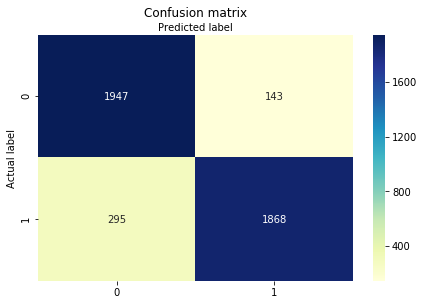

In [28]:
#9. Applying different models

#9.1 Logistic Regression Model

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))



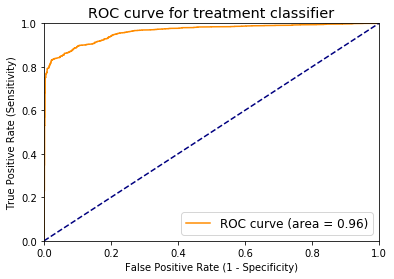

In [29]:
# ROC for logistic regression

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Accuracy: 0.9407477075005878
Precision: 0.955216769890424
Recall: 0.9269533055940823
F1_Score: 0.9408728296574379


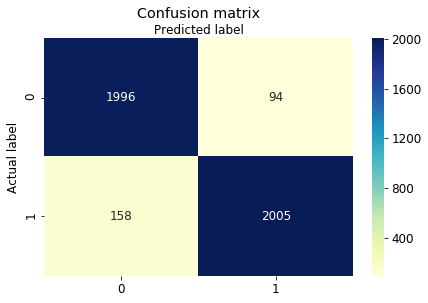

In [30]:
# 9.2 KNeibhour model

# instantiate the model (using the default parameters)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

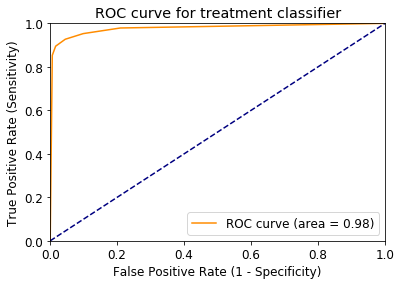

In [31]:
# ROC for K nearest Neibhour

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        
       

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.936045144603809
Precision: 0.9462010382255781
Recall: 0.9269533055940823
F1_Score: 0.9364782811770201


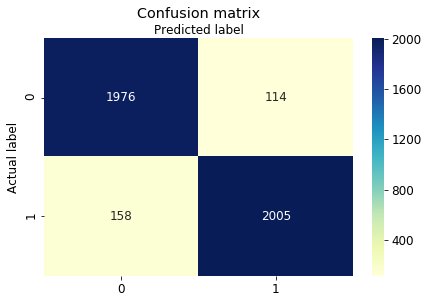

In [34]:
#9.4 Random Forest 

forest = RandomForestClassifier(n_estimators = 20)

# fit the model with data
forest.fit(X_train,y_train)
y_pred=tree.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))


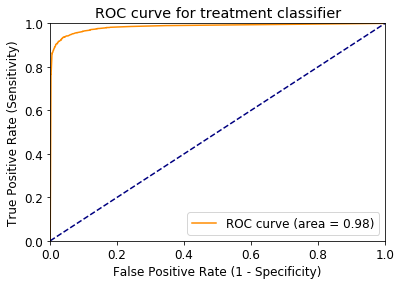

In [35]:
# ROC for random forest

y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8984246414295791
Precision: 0.9261447562776958
Recall: 0.869625520110957
F1_Score: 0.8969957081545064


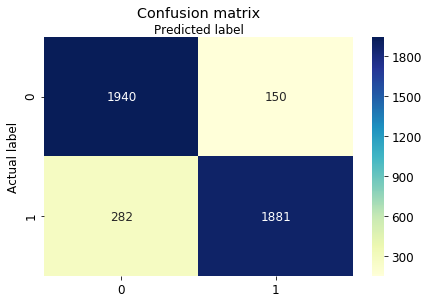

In [36]:
# 9.5 SVM model


svm = SVC(kernel='linear' , probability=True) 
# fit the model with data
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))



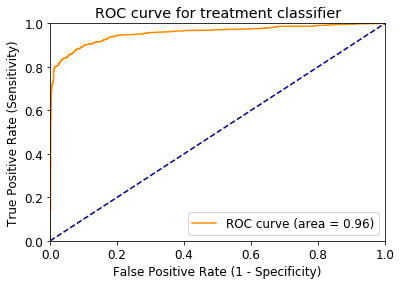

In [37]:
# ROC SVM

y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8746766988008464
Precision: 0.9132860040567952
Recall: 0.8326398520573278
F1_Score: 0.871100362756953


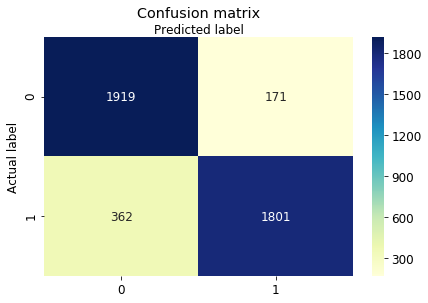

In [38]:
#9.6  Naive Bayes

gnb = GaussianNB()

# fit the model with data
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

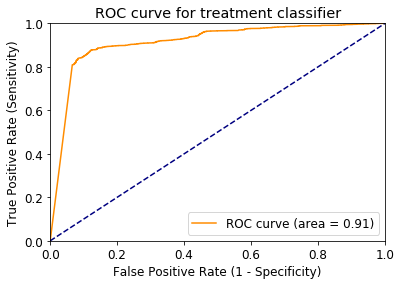

In [39]:
# ROC Naive Bayes

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9459205266870444
Precision: 0.9595815501664289
Recall: 0.932963476652797
F1_Score: 0.9460853258321613


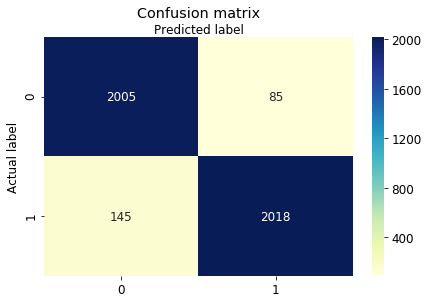

In [40]:
# Bagging classifier

bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    

# fit the model with data

bag.fit(X_train, y_train)
y_pred=bag.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))
   

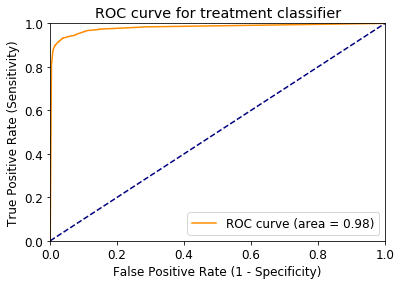

In [41]:
# ROC for bagging

y_pred_proba = bag.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9351046320244534
Precision: 0.9533877943296492
Recall: 0.9172445677300046
F1_Score: 0.9349670122525917


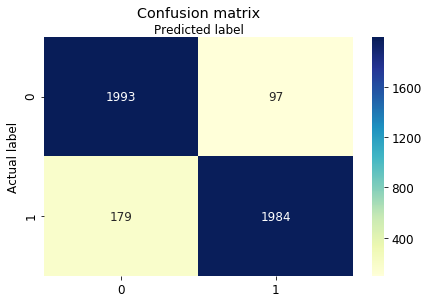

In [42]:
#Boosting with classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)

# fitting the model
boost.fit(X_train, y_train)
y_pred=boost.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))
       

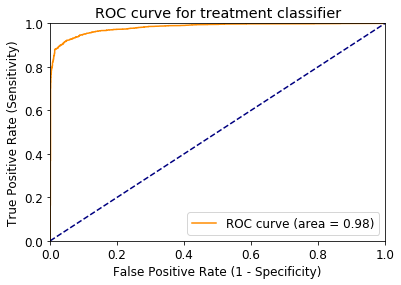

In [43]:
# ROC for boosting

y_pred_proba = boost.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        